In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
# To check the number of rows
# To check column names
# To check data type for each column

In [3]:
file = 'iris_data.csv'
data = pd.read_csv(file)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# number of rows
print(data.shape[0]) # or, len(data) gives number of rows

# colunm name
print(data.columns.tolist())

# data types
print(data.dtypes)

150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [5]:
# To examine the species names and note that they ann begin with 'iris-'

In [6]:
data['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [7]:
# The str method maps the following function to each entry as a string
data['species'] = data.species.str.replace('Iris-', '') # this is string processing method

# alternately:- 
# data['species']= data.species.apply(lambda r1 r.replace('Iris-', '')) # this is apply method

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# To determine the following
# The number of each species present( check out the series) 
# The mean,median and quantiles and ranges(max-min) for each petal and sepal measurement

In [9]:
# the .describe method does have median, but it is not called median. It's the 50% quantile.
# .describe does not have range, and in order to get range we need to create nwe entry in the .describe table
# which is max - min

In [10]:
# one way to count each petal
data.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [11]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
stats_df

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
range,3.600000,2.400000,5.900000,2.400000


In [13]:
# select just the rows desired from the 'describe' method and add in the 'median'

stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean', '25%', '50%', '75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


Calculate the following for each species in a seperate dataframe

1. The mean of each measurement(sepal_length, sepal_width, petal_length and petal_width)
2. The median of each ofthese measurements.

In [14]:
# we may need to use Pandas 'groupby' method to group by species before calculating the statistic

In [15]:
# The mean calculation
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [16]:
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [17]:
# applying multiple functions at once ( 2 methods)

data.groupby('species').agg(['mean', 'median']) # passing a list of recognized strings
data.groupby('species').agg([np.mean, np.median]) # passing a list of explicit aggression functions 

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [ ]:
# If certain fields need to be aggregated differently
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field := 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

Make a scatter plot of sepal_length vs sepal_width using Matplotlib. Label the axes and give the plot a title

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

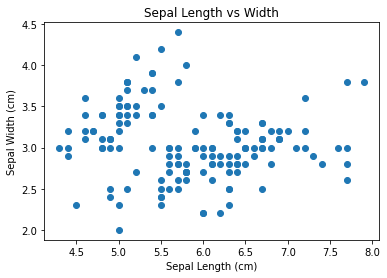

In [21]:
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
      ylabel='Sepal Width (cm)',
      title='Sepal Length vs Width');

# Histogram of any feature and label axes and title it as appropriate

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Petal Length (cm)'),
 Text(0.5, 1.0, 'Distribution of Petal Length')]

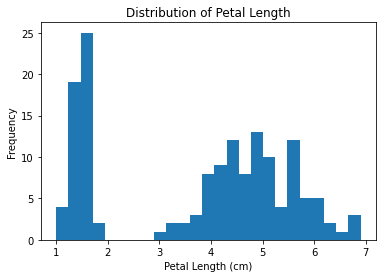

In [22]:
#  using matplotlib's plotting functionality

ax = plt.axes()
ax.hist(data.petal_length, bins=25)
    
ax.set(xlabel ='Petal Length (cm)',
      ylabel='Frequency',
       title='Distribution of Petal Length')
       

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Petal Length (cm)'),
 Text(0.5, 1.0, 'Distribution of Petal Length')]

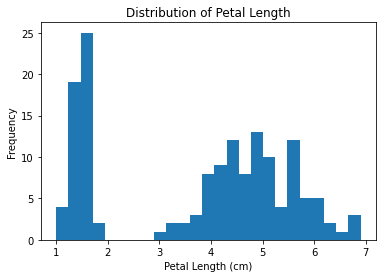

In [23]:
# alternatively using Pandas plotting functionality

ax= data.petal_length.plot.hist(bins=25)

ax.set(xlabel ='Petal Length (cm)',
      ylabel='Frequency',
       title='Distribution of Petal Length')
       

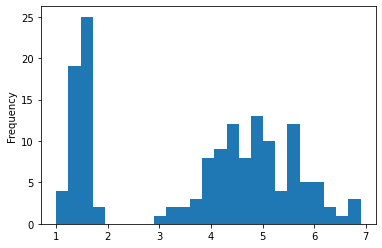

In [24]:
data.petal_length.plot.hist(bins=25) # if we call this we have histogram without label

Create a single plot with histogram for each feature overlayed.

For some hints on how to do thid with Pandas plotting metnods, check out visualization guide for pandas

Text(0.5, 0, 'Size (cm)')

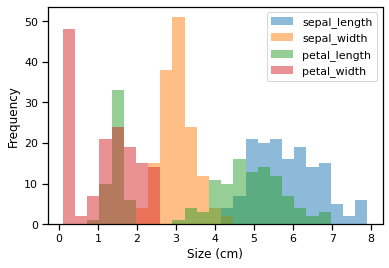

In [25]:
import seaborn as sns

sns.set_context('notebook')
# This uses '.plot.hist' method
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)')

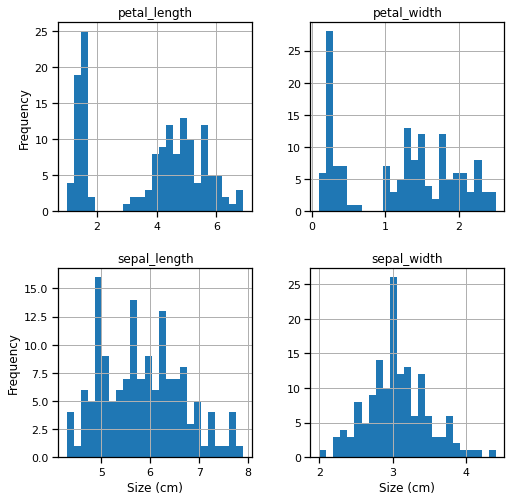

In [26]:
# To create four seperate plots, use Pamdas '.hist' method

axList = data.hist(bins=25, figsize =(8,8)) #  'figsize' resizes the plot according to instruction 

# Add some x and y labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel("Frequency")

Using Pandas, make boxplot of each petal and sepal measurement.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A26C8584F0>,
      dtype=object)

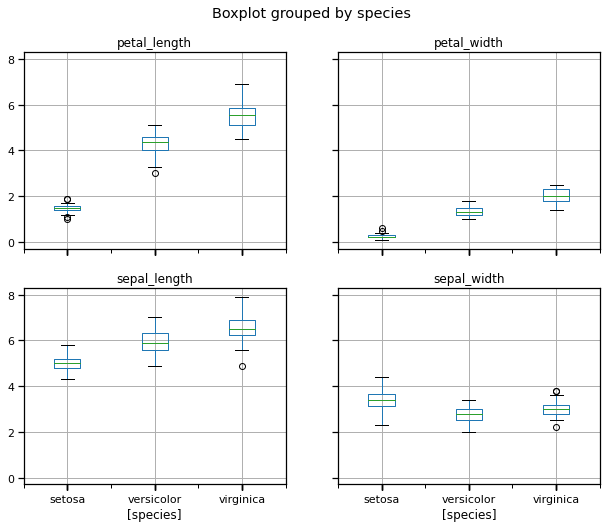

In [27]:
# Here we have four seperate plots
data.boxplot(by='species', figsize = (10,8))  # 'figsize' resizes the plot

Single boxplot where the features are seperated in the x-ais and species are colored with different hues.

In [28]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
data.set_index('species').stack().to_frame()

0
species                    
setosa    sepal_length  5.1
          sepal_width   3.5
          petal_length  1.4
          petal_width   0.2
          sepal_length  4.9
...                     ...
virginica petal_width   2.3
          sepal_length  5.9
          sepal_width   3.0
          petal_length  5.1
          petal_width   1.8

[600 rows x 1 columns]

In [30]:
# First we have to reshape the data so there is only a single measurement in each column

plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )
plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


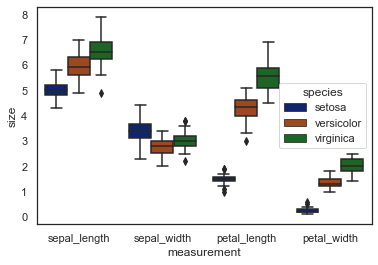

In [31]:
# Now plot the dataframe from above using Seaborn

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize = (6,4))
sns.boxplot(x = 'measurement', y = 'size',
            hue = 'species', data=plot_data)

Make a pairplot with Seaborn to examine the correlation between each of the measurements

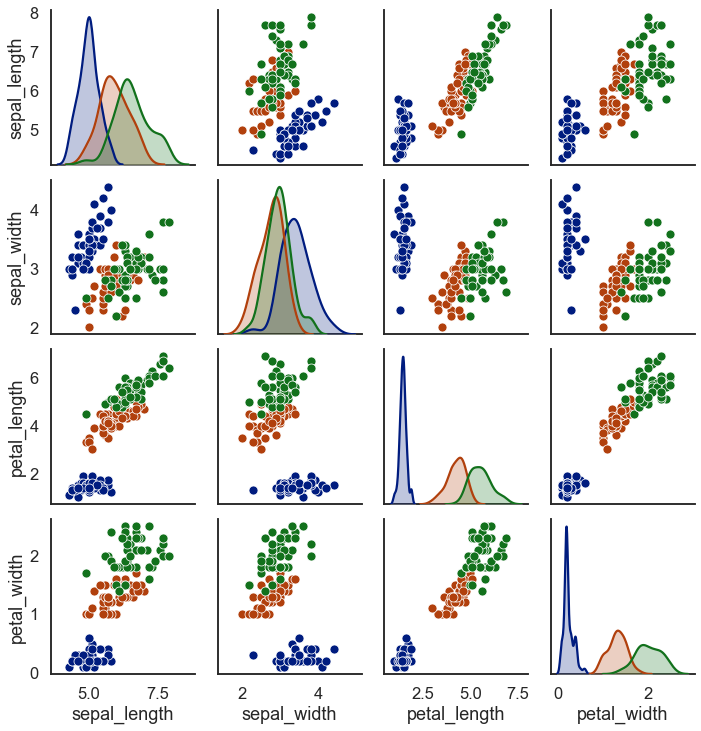

In [32]:
sns.set_context('talk')
plot = sns.pairplot(data, hue = 'species')
plot._legend.remove()
plot